# Pymaceuticals Inc.
___

**Analysis Summary - Key Statistics**

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [2]:
# Study data files
mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# Combine the data into a single DataFrame
combined_mouse_data = pd.merge(study_results, mouse_metadata, how='left', left_on=["Mouse ID"], right_on = ["Mouse ID"])
# Display the data table for preview
combined_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
Num_Mice = combined_mouse_data["Mouse ID"].nunique()
Num_Mice

249

In [6]:
# Identify duplicate rows based on Mouse ID and Timepoint
duplicate_mice = combined_mouse_data[combined_mouse_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Extract unique Mouse IDs from duplicate entries
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()

# Display the duplicate Mouse IDs
duplicate_mice_ids

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# combined_mouse_data_cleaned = combined_mouse_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
# combined_mouse_data_cleaned

combined_mouse_data_cleaned = combined_mouse_data[combined_mouse_data['Mouse ID'].isin(duplicate_mice_ids) == False]
combined_mouse_data_cleaned.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
# Checking the number of mice in the clean DataFrame.
Num_Mice = combined_mouse_data_cleaned["Mouse ID"].nunique()
Num_Mice

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group by 'Drug Regimen'
grouped_combined_mouse_data_cleaned = combined_mouse_data_cleaned.groupby('Drug Regimen')
# grouped_combined_mouse_data_cleaned.head()

# # Calculate mean
mean_tumor_volume = grouped_combined_mouse_data_cleaned['Tumor Volume (mm3)'].mean()
# # # Calculate median
median_tumor_volume = grouped_combined_mouse_data_cleaned['Tumor Volume (mm3)'].median()
# # Calculate variance
variance_tumor_volume = grouped_combined_mouse_data_cleaned['Tumor Volume (mm3)'].var()
# Calculate standard deviation
std_dev_tumor_volume = grouped_combined_mouse_data_cleaned['Tumor Volume (mm3)'].std()
# # Calculate SEM (Standard Error of the Mean)
sem_tumor_volume = grouped_combined_mouse_data_cleaned['Tumor Volume (mm3)'].sem()

Summary_statistics_reg_df = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': variance_tumor_volume,
    'Tumor Volume Standard Deviation': std_dev_tumor_volume,
    'Tumor Volume Std.Err.': sem_tumor_volume
})
Summary_statistics_reg_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_df = combined_mouse_data_cleaned.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var','std', 'sem']})
summary_stats_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

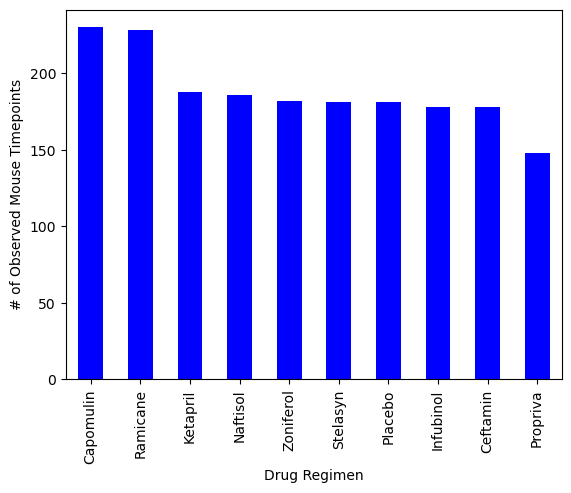

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Count the number of rows for each drug regimen
Regimen_counts = combined_mouse_data_cleaned["Drug Regimen"].value_counts()
# Plot the bar plot
Regimen_counts.plot(kind='bar', color='blue', alpha=1)
# Set plot title and labels
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

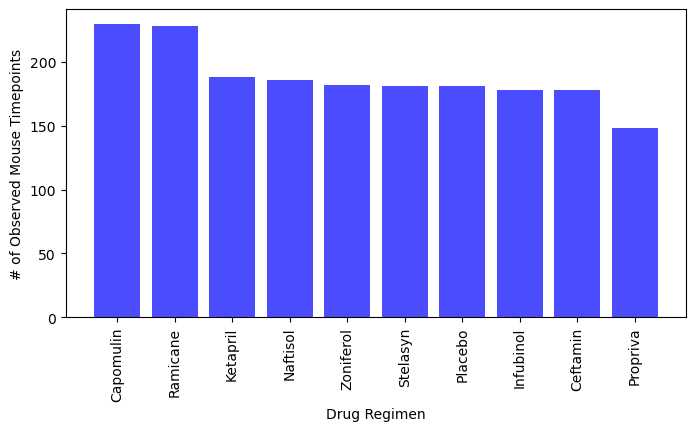

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

#Count the number of rows for each drug regimen
Regimen_counts = combined_mouse_data_cleaned["Drug Regimen"].value_counts()

# Obtain drug regimens and their counts
x_axis = Regimen_counts.index
y_axis = Regimen_counts.values

# Plot the bar plot
#plt.figure(figsize=(width, height)) is a function used to create a new figure with a specific width and height.
plt.figure(figsize=(8, 4))
plt.bar(x_axis, y_axis, color='blue', alpha=0.7)
plt.xticks(rotation = 90)

# Set plot title and labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

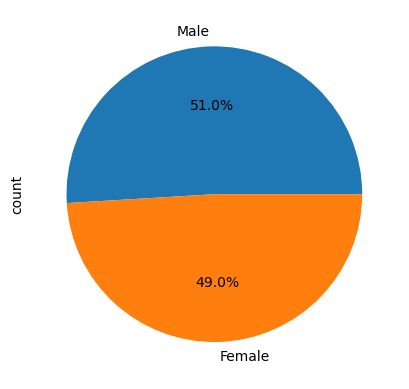

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Count the number of male and female mice
sex_dist_df = combined_mouse_data_cleaned['Sex'].value_counts()

# Plot the pie chart
sex_dist_df.plot(kind='pie', autopct='%1.1f%%')

plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

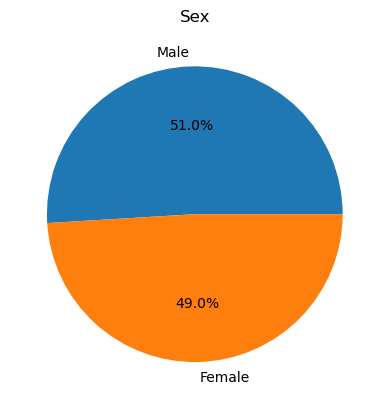

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Count the number of male and female mice
sex_dist_df = combined_mouse_data_cleaned['Sex'].value_counts()

labels = sex_dist_df.index
sizes = sex_dist_df.values
# colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
# explode = (0.1, 0, 0, 0)

plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Sex")
plt.show

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_mouse_timepoint_df = pd.DataFrame(combined_mouse_data_cleaned.groupby('Mouse ID')['Timepoint'].max())
# last_mouse_timepoint_df = pd.DataFrame(last_mouse_timepoint)

# # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
combined_timepoint_volume = pd.merge(last_mouse_timepoint_df, combined_mouse_data, how='left', on = ["Mouse ID", "Timepoint"])

condition = combined_timepoint_volume['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

selected_combined_timepoint_volume = combined_timepoint_volume.loc[condition, ['Mouse ID', 'Timepoint', 'Drug Regimen','Tumor Volume (mm3)']]

# # Display the data table for preview
selected_combined_timepoint_volume



,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,a203,45,Infubinol,67.973419
1,a251,45,Infubinol,65.525743
3,a275,45,Ceftamin,62.999356
6,a411,45,Ramicane,38.407618
7,a444,45,Ramicane,43.047543
...,...,...,...,...
238,y769,45,Ceftamin,68.594745
239,y793,45,Capomulin,31.896238
240,y865,45,Ceftamin,64.729837
244,z578,45,Ramicane,30.638696


In [17]:
# Put treatments into a list for for loop (and later for plot labels)

Drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Drug_list_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for Drug in Drug_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    Drug_summary = selected_combined_timepoint_volume.loc[selected_combined_timepoint_volume["Drug Regimen"] ==Drug, "Tumor Volume (mm3)"]
    print(Drug_summary)
   
    # add subset 
    Drug_list_volume.append(Drug_summary)
    
    # Determine outliers using upper and lower bounds

    quartiles = Drug_summary.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"The lower quartile of temperatures is: {lowerq}")
    print(f"The upper quartile of temperatures is: {upperq}")
    print(f"The interquartile range of temperatures is: {iqr}")
    print(f"The the median of temperatures is: {quartiles[0.5]} ")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")


19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
80     47.685963
83     37.311846
85     38.125164
87     38.753265
108    41.483008
115    38.846876
121    28.430964
124    33.329098
162    46.539206
163    32.377357
169    41.581521
174    23.343598
180    40.728578
183    34.455298
192    31.023923
204    40.658124
208    39.952347
220    36.041047
226    28.484033
239    31.896238
Name: Tumor Volume (mm3), dtype: float64
The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
6      38.407618
7      43.047543
10     38.810366
12     32.978522
33     38.342008
37     33.397653
45     37.311236
52     40.659006
70     29.128472
76     33.562402
77     36.374510
91     31.560470
93     36.134852
96     22

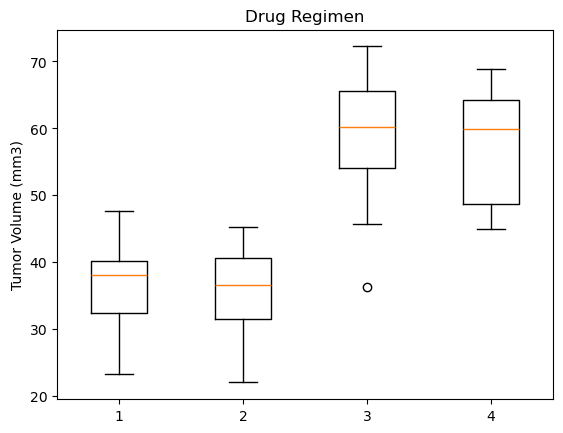

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(Drug_list_volume)
plt.show()


## Line and Scatter Plots

## Correlation and Regression

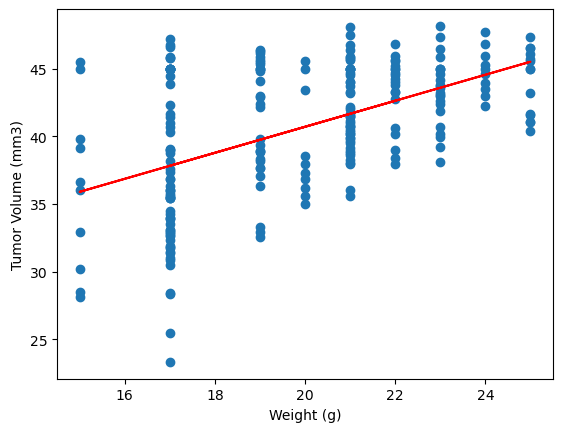

In [21]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Locate the rows which contain mice on each drug and get the tumor volumes

#Create empty lists to fill with tumor vol data and weights (for plotting)

Capomulin_volume = []


Drug_summary = combined_mouse_data_cleaned.loc[combined_mouse_data_cleaned["Drug Regimen"]== "Capomulin", "Tumor Volume (mm3)"]
Capomulin_weight = combined_mouse_data_cleaned.loc[combined_mouse_data_cleaned["Drug Regimen"]== "Capomulin", "Weight (g)"]

Capomulin_volume.append(Drug_summary)

# Add the linear regression equation and line to plot
x_values = Capomulin_weight
y_values = Capomulin_volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

